In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA PATH
RAW_DATA_PATH = os.path.join("..","datasets","raw","airline_passengers.csv")
RAW_DATA_PATH

'../datasets/raw/airline_passengers.csv'

In [3]:
air = pd.read_csv(RAW_DATA_PATH, parse_dates=['Month'], index_col='Month')
air

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
# Auto ARIMA Model
auto_model = pm.auto_arima(air.AirPassengers, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

### Model Diagnostic

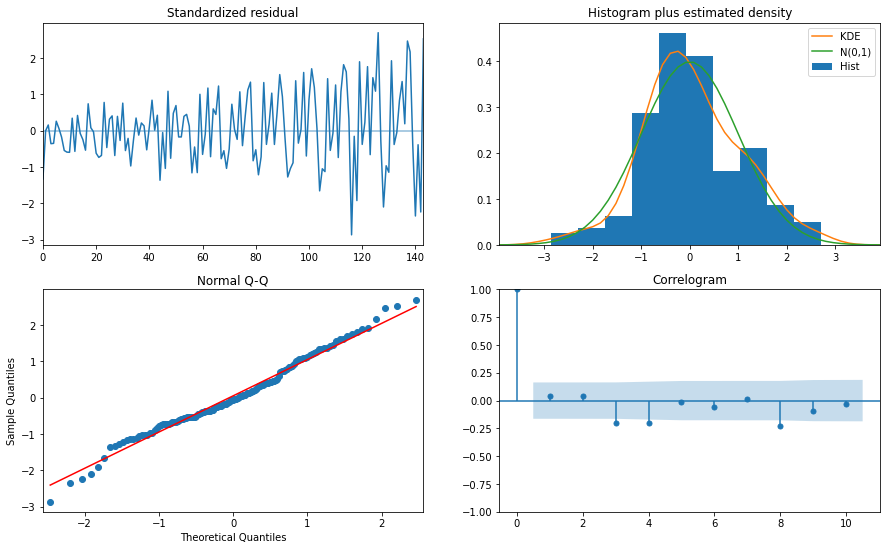

In [5]:
# Diagnostics plots
auto_model.plot_diagnostics(figsize=(15,9))
plt.show()

## Forecast

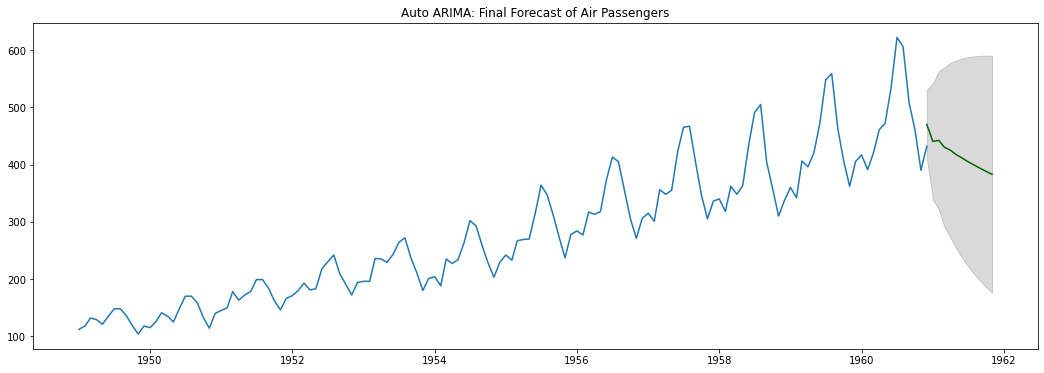

In [6]:
# Auto ARIMA Forecast
n_periods = 12  # In months
auto_fc, auto_confint = auto_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(air.AirPassengers.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
auto_fc_series = pd.Series(auto_fc, index=index_of_fc)
lower_series = pd.Series(auto_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(auto_confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(18,6))
plt.plot(air.AirPassengers)
plt.plot(auto_fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Auto ARIMA: Final Forecast of Air Passengers")
plt.show()

### Model Performance

In [7]:
# Auto ARIMA Performance Metrics
auto_arima_performance = forecast_accuracy(test.values, auto_fc)
print("Auto ARIMA Performance:")
print("="*36)
for k, v in auto_arima_performance.items():
    print(k +" : "+ str(v))

NameError: name 'forecast_accuracy' is not defined